# <center> Pandas (part 02) <center>

<img src = 'https://github.com/saeed-saffari/alzahra-workshop-spr2021/blob/main/lecture/PIC/Pandas.png?raw=true' 
     width = "550"
     >

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Data Cleaning and Preparation
### 1.1 Handling Missing Data (Na, NAN)

Missing data occurs commonly in many data analysis applications. One of the goals of pandas is to make working with missing data as painless as possible. For example, all of the descriptive statistics on pandas objects exclude missing data by default.

The way that missing data is represented in pandas objects is somewhat imperfect, but it is functional for a lot of users. For numeric data, pandas uses the floating-point value ``NaN`` (`Not a Number`) to represent missing data.

In pandas, we’ve adopted a convention used in the R programming language by referring to missing data as `NA`, which stands for `not available`. In statistics applications, `NA` data may either be data that does not exist or that exists but was not observed (through problems with data collection, for example). When cleaning up data for analysis, it is often important to do analysis on the missing data itself to identify data collection problems or potential biases in the data caused by missing data.

- **NA handling methods**

|Argument | Description |
| ---     | ---         |
|dropna   |Filteaxis labels based on whether values for each label have missing data, with varying thresholds for how much missing data to tolerate. |
|fillna   | Fill in missing data with some value or using an interpolation method such as'ffill'or'bfill'. |
|isnull   | Return boolean values indicating which values are missing/NA. |
|notnull  | Negation ofisnull.|
  

In [3]:
df = pd.DataFrame({
    'col1':[1,2,3,4,np.nan],
    'col2':[np.nan,555,np.nan,444, 333],
    'col3':['abc', 'def', 'ghi', 'xyz', 'ghj'],
    'col4':['16', '23', '16', '25', '27'],
    'col5':['187', '160', np.nan, '202', '163']
})

In [4]:
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,NaN,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,NaN,333.0,ghj,27,163


In [5]:
df.isnull()

,col1,col2,col3,col4,col5
0,False,True,False,False,False
1,False,False,False,False,False
2,False,True,False,False,True
3,False,False,False,False,False
4,True,False,False,False,False


In [6]:
df.isna()

,col1,col2,col3,col4,col5
0,False,True,False,False,False
1,False,False,False,False,False
2,False,True,False,False,True
3,False,False,False,False,False
4,True,False,False,False,False


In [7]:
df.notnull()

,col1,col2,col3,col4,col5
0,True,False,True,True,True
1,True,True,True,True,True
2,True,False,True,True,False
3,True,True,True,True,True
4,False,True,True,True,True


The `dropna` can be helpful that returns the Series or DataFrame with only the `non-null` data and index values.   
Also you may want to drop rows or columns that are all `NA` or only those containing any `NA`s. `dropna` by default drops any row containing a missing value.

In [8]:
df.dropna()

,col1,col2,col3,col4,col5
1,2.0,555.0,def,23,160
3,4.0,444.0,xyz,25,202


Passing `how='all'` will only drop rows that are all `NA`:

In [9]:
df.loc[6]= np.nan

In [10]:
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,NaN,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,NaN,333.0,ghj,27,163
6,NaN,NaN,NaN,NaN,NaN


In [12]:
df.dropna(axis = 0, how = 'all', inplace=True)
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,NaN,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,NaN,333.0,ghj,27,163


To drop columns in the same way, pass `axis=1`:

In [13]:
df['col6'] = np.nan

In [14]:
df

,col1,col2,col3,col4,col5,col6
0,1.0,NaN,abc,16,187,NaN
1,2.0,555.0,def,23,160,NaN
2,3.0,NaN,ghi,16,NaN,NaN
3,4.0,444.0,xyz,25,202,NaN
4,NaN,333.0,ghj,27,163,NaN


In [15]:
df.dropna(axis = 1)

,col3,col4
0,abc,16
1,def,23
2,ghi,16
3,xyz,25
4,ghj,27


In [17]:
df.dropna(axis = 1, how = 'all', inplace=True)
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,NaN,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,NaN,333.0,ghj,27,163


### 1.2 Filling In Missing Data

Rather than filtering out missing data (and potentially discarding other data along with it), you may want to fill in the “holes” in any number of ways. For most purposes, the `fillna` method is the workhorse function to use. Calling `fillna` with a constant replaces missing values with that value:

In [18]:
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,NaN,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,NaN,333.0,ghj,27,163


In [21]:
df.fillna(120)

,col1,col2,col3,col4,col5
0,1.0,120.0,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,120.0,ghi,16,120
3,4.0,444.0,xyz,25,202
4,120.0,333.0,ghj,27,163


In [22]:
df.fillna('missing')

,col1,col2,col3,col4,col5
0,1.0,missing,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,missing,ghi,16,missing
3,4.0,444.0,xyz,25,202
4,missing,333.0,ghj,27,163


Calling `fillna` with a dict, you can use a different fill value for each column:

In [23]:
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,NaN,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,NaN,333.0,ghj,27,163


In [25]:
df.fillna({'col1':123, 'col2':'missing'})

,col1,col2,col3,col4,col5
0,1.0,missing,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,missing,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,123.0,333.0,ghj,27,163


The same `interpolation` methods available for reindexing can be used with `fillna`:

In [26]:
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,NaN,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,NaN,333.0,ghj,27,163


In [27]:
df.fillna(method='ffill')

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,555.0,ghi,16,160
3,4.0,444.0,xyz,25,202
4,4.0,333.0,ghj,27,163


In [28]:
df.fillna(method='ffill').dropna()

,col1,col2,col3,col4,col5
1,2.0,555.0,def,23,160
2,3.0,555.0,ghi,16,160
3,4.0,444.0,xyz,25,202
4,4.0,333.0,ghj,27,163


In [30]:
df.fillna(method='bfill')

,col1,col2,col3,col4,col5
0,1.0,555.0,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,444.0,ghi,16,202
3,4.0,444.0,xyz,25,202
4,NaN,333.0,ghj,27,163


In [32]:
df.fillna(df.mean(numeric_only=True))

,col1,col2,col3,col4,col5
0,1.0,444.0,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,444.0,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,2.5,333.0,ghj,27,163


In [33]:
df.interpolate()

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,499.5,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,4.0,333.0,ghj,27,163


In [37]:
df[['col4', 'col5']] = df[['col4', 'col5']].astype(float)

In [38]:
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,NaN,ghi,16.0,NaN
3,4.0,444.0,xyz,25.0,202.0
4,NaN,333.0,ghj,27.0,163.0


In [39]:
df.fillna(df.mean(numeric_only=True))

,col1,col2,col3,col4,col5
0,1.0,444.0,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,444.0,ghi,16.0,178.0
3,4.0,444.0,xyz,25.0,202.0
4,2.5,333.0,ghj,27.0,163.0


In [40]:
df.interpolate()

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,499.5,ghi,16.0,181.0
3,4.0,444.0,xyz,25.0,202.0
4,4.0,333.0,ghj,27.0,163.0


### 1.3 Removing Duplicates

Duplicate rows may be found in a DataFrame for any number of reasons. Here is an example:

In [41]:
df.loc[5] = df.loc[4]
df.loc[6] = df.loc[3]
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,NaN,ghi,16.0,NaN
3,4.0,444.0,xyz,25.0,202.0
4,NaN,333.0,ghj,27.0,163.0
5,NaN,333.0,ghj,27.0,163.0
6,4.0,444.0,xyz,25.0,202.0


The DataFrame method duplicated returns a boolean Series indicating whether each row is a duplicate (has been observed in a previous row) or not:

In [42]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
6     True
dtype: bool

Relatedly, drop_duplicates returns a DataFrame where the duplicated array is False:

In [43]:
df.drop_duplicates()

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,NaN,ghi,16.0,NaN
3,4.0,444.0,xyz,25.0,202.0
4,NaN,333.0,ghj,27.0,163.0


In [45]:
df[df.duplicated()]

,col1,col2,col3,col4,col5
5,NaN,333.0,ghj,27.0,163.0
6,4.0,444.0,xyz,25.0,202.0


In [46]:
df[- df.duplicated()]

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,NaN,ghi,16.0,NaN
3,4.0,444.0,xyz,25.0,202.0
4,NaN,333.0,ghj,27.0,163.0


Both of these methods by default consider all of the columns; alternatively, you can specify any subset of them to detect duplicates. Suppose we had an additional column of values and wanted to filter duplicates only based on the `'col4'` column:

In [47]:
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,NaN,ghi,16.0,NaN
3,4.0,444.0,xyz,25.0,202.0
4,NaN,333.0,ghj,27.0,163.0
5,NaN,333.0,ghj,27.0,163.0
6,4.0,444.0,xyz,25.0,202.0


In [48]:
df.drop_duplicates(['col4'])

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
3,4.0,444.0,xyz,25.0,202.0
4,NaN,333.0,ghj,27.0,163.0


`duplicated` and `drop_duplicates` by default keep the first observed value combination. Passing `keep='last'` will return the last one:

In [49]:
df.drop_duplicates(['col4'], keep='last')

,col1,col2,col3,col4,col5
1,2.0,555.0,def,23.0,160.0
2,3.0,NaN,ghi,16.0,NaN
5,NaN,333.0,ghj,27.0,163.0
6,4.0,444.0,xyz,25.0,202.0


### 1.4 Replacing Values

Filling in missing data with the `fillna` method is a special case of more general value replacement. Now `replace` method provides a simpler and more flexible and general way to do so.

In [50]:
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,NaN,ghi,16.0,NaN
3,4.0,444.0,xyz,25.0,202.0
4,NaN,333.0,ghj,27.0,163.0
5,NaN,333.0,ghj,27.0,163.0
6,4.0,444.0,xyz,25.0,202.0


In [51]:
df.replace(333, 567)

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,NaN,ghi,16.0,NaN
3,4.0,444.0,xyz,25.0,202.0
4,NaN,567.0,ghj,27.0,163.0
5,NaN,567.0,ghj,27.0,163.0
6,4.0,444.0,xyz,25.0,202.0


In [52]:
df.replace(np.nan, 'missing')

,col1,col2,col3,col4,col5
0,1.0,missing,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,missing,ghi,16.0,missing
3,4.0,444.0,xyz,25.0,202.0
4,missing,333.0,ghj,27.0,163.0
5,missing,333.0,ghj,27.0,163.0
6,4.0,444.0,xyz,25.0,202.0


In [53]:
df.replace(np.nan, df.mean(numeric_only=True))

,col1,col2,col3,col4,col5
0,1.0,421.8,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,421.8,ghi,16.0,179.5
3,4.0,444.0,xyz,25.0,202.0
4,2.8,333.0,ghj,27.0,163.0
5,2.8,333.0,ghj,27.0,163.0
6,4.0,444.0,xyz,25.0,202.0


In [54]:
df.replace([16,444],[12,'all'])

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,12.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,NaN,ghi,12.0,NaN
3,4.0,all,xyz,25.0,202.0
4,NaN,333.0,ghj,27.0,163.0
5,NaN,333.0,ghj,27.0,163.0
6,4.0,all,xyz,25.0,202.0


## 2. Combining Datasets
### 2.1 Concat

Some of the most interesting studies of data come from combining different data sources.  
These operations can involve anything from very straightforward concatenation of two different datasets, to more complicated database-style joins and merges that correctly handle any overlaps between the datasets.
``Series`` and ``DataFrame``s are built with this type of operation in mind, and Pandas includes functions and methods that make this sort of data wrangling fast and straightforward.

Here we'll take a look at simple concatenation of ``Series`` and ``DataFrame``s with the ``pd.concat`` function; later we'll dive into more sophisticated in-memory merges and joins implemented in Pandas.

In [56]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [57]:
df1 = make_df('ABCD', range(4))
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [58]:
df2 = make_df('ABCD', range(4,8))
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


``pd.concat()`` can be used for a simple concatenation of ``Series`` or ``DataFrame`` objects.

In [59]:
pd.concat([df1, df2], axis = 0)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [60]:
pd.concat([df1,df2], axis = 1)

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7


In [61]:
df3 = make_df('EFGH', range(4))
df3

,E,F,G,H
0,E0,F0,G0,H0
1,E1,F1,G1,H1
2,E2,F2,G2,H2
3,E3,F3,G3,H3


In [63]:
pd.concat([df1,df3], axis = 1)

,A,B,C,D,E,F,G,H
0,A0,B0,C0,D0,E0,F0,G0,H0
1,A1,B1,C1,D1,E1,F1,G1,H1
2,A2,B2,C2,D2,E2,F2,G2,H2
3,A3,B3,C3,D3,E3,F3,G3,H3


In [64]:
pd.concat([df1,df3], axis = 0)

,A,B,C,D,E,F,G,H
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,E0,F0,G0,H0
1,NaN,NaN,NaN,NaN,E1,F1,G1,H1
2,NaN,NaN,NaN,NaN,E2,F2,G2,H2
3,NaN,NaN,NaN,NaN,E3,F3,G3,H3


### 2.2 Merge
One essential feature offered by Pandas is its high-performance, in-memory join and merge operations.
If you have ever worked with databases, you should be familiar with this type of data interaction.
The main interface for this is the ``pd.merge`` function, and we'll see few examples of how this can work in practice.

In [65]:
left = pd.DataFrame({
    'key': ['k0', 'k1', 'k2', 'k3'],
    'A'  : ['A0', 'A1', 'A2', 'A3'],
    'B'  : ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({
    'key': ['k0', 'k1', 'k2', 'k4'],
    'C'  : ['C0', 'C1', 'C2', 'C4'],
    'D'  : ['D0', 'D1', 'D2', 'D4']})

In [66]:
left

,key,A,B
0,k0,A0,B0
1,k1,A1,B1
2,k2,A2,B2
3,k3,A3,B3


In [67]:
right

,key,C,D
0,k0,C0,D0
1,k1,C1,D1
2,k2,C2,D2
3,k4,C4,D4


Most simply, you can explicitly specify the name of the key column using the on keyword, which takes a column name or a list of column names:

In [68]:
pd.merge(left, right, how = 'inner', on = 'key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,A1,B1,C1,D1
2,k2,A2,B2,C2,D2


In [69]:
pd.merge(left, right, how = 'outer', on = 'key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,A1,B1,C1,D1
2,k2,A2,B2,C2,D2
3,k3,A3,B3,NaN,NaN
4,k4,NaN,NaN,C4,D4


In [70]:
pd.merge(left, right, how = 'left', on = 'key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,A1,B1,C1,D1
2,k2,A2,B2,C2,D2
3,k3,A3,B3,NaN,NaN


In [71]:
pd.merge(left, right, how = 'right', on = 'key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,A1,B1,C1,D1
2,k2,A2,B2,C2,D2
3,k4,NaN,NaN,C4,D4


## 3. Group by

`DataFrame.groupby()` function is used to collect the identical data into groups and perform aggregate functions on the grouped data. Group by operation involves splitting the data, applying some functions, and finally aggregating the results.

In [72]:
data = {
    'Company': ['GOOG', 'GOOG','GOOG', 'MSFT', 'MSFT', 'FB', 'FB'],
    'Person' : ['Sam', 'Charlie', 'John', 'Amy', 'Vanessa', 'Carl', 'Sarah'],
    'Sales'  : [200, 120, 236, 340, 124, 243, 350]
}

In [73]:
df = pd.DataFrame(data)
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,GOOG,John,236
3,MSFT,Amy,340
4,MSFT,Vanessa,124
5,FB,Carl,243
6,FB,Sarah,350


In [74]:
by_comp = df.groupby('Company')
by_comp

In [76]:
by_comp.mean(numeric_only=True)

,Sales
Company,
FB,296.500000
GOOG,185.333333
MSFT,232.000000


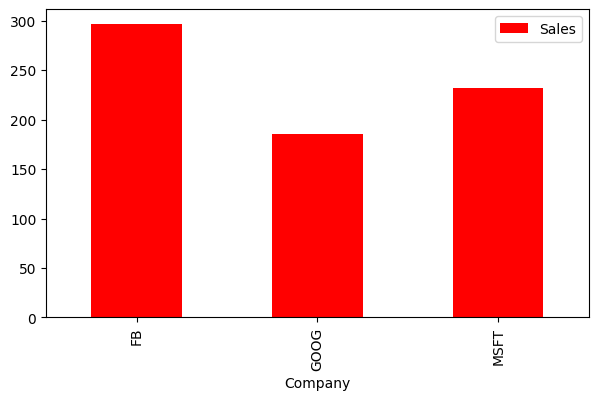

In [79]:
by_comp.mean(numeric_only=True).plot(kind = 'bar', color = 'r', figsize=(7,4))
plt.show()

In [80]:
by_comp.std(numeric_only=True)

,Sales
Company,
FB,75.660426
GOOG,59.374518
MSFT,152.735065


In [81]:
by_comp.max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,236
MSFT,Vanessa,340


In [82]:
by_comp.min()

,Person,Sales
Company,,
FB,Carl,243
GOOG,Charlie,120
MSFT,Amy,124


In [83]:
by_comp.count()

,Person,Sales
Company,,
FB,2,2
GOOG,3,3
MSFT,2,2


In [84]:
by_comp.agg(['count', 'max', 'min'])

Person                   Sales          
         count      max      min count  max  min
Company                                         
FB           2    Sarah     Carl     2  350  243
GOOG         3      Sam  Charlie     3  236  120
MSFT         2  Vanessa      Amy     2  340  124

In [85]:
by_comp.groups

{'FB': [5, 6], 'GOOG': [0, 1, 2], 'MSFT': [3, 4]}

In [88]:
by_comp.get_group('GOOG')

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,GOOG,John,236


In [89]:
by_comp.describe()

Sales                                                             
        count        mean         std    min     25%    50%     75%    max
Company                                                                   
FB        2.0  296.500000   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      3.0  185.333333   59.374518  120.0  160.00  200.0  218.00  236.0
MSFT      2.0  232.000000  152.735065  124.0  178.00  232.0  286.00  340.0

In [90]:
by_comp.describe().columns

MultiIndex([('Sales', 'count'),
            ('Sales',  'mean'),
            ('Sales',   'std'),
            ('Sales',   'min'),
            ('Sales',   '25%'),
            ('Sales',   '50%'),
            ('Sales',   '75%'),
            ('Sales',   'max')],
           )

In [92]:
by_comp.describe()['Sales']

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
FB,2.0,296.500000,75.660426,243.0,269.75,296.5,323.25,350.0
GOOG,3.0,185.333333,59.374518,120.0,160.00,200.0,218.00,236.0
MSFT,2.0,232.000000,152.735065,124.0,178.00,232.0,286.00,340.0


In [94]:
by_comp.describe()['Sales'][['max', 'min']]

,max,min
Company,,
FB,350.0,243.0
GOOG,236.0,120.0
MSFT,340.0,124.0


In [96]:
by_comp.describe()['Sales']['max'].max()

350.0

In [97]:
by_comp.agg(['count', 'max', 'min'])

Person                   Sales          
         count      max      min count  max  min
Company                                         
FB           2    Sarah     Carl     2  350  243
GOOG         3      Sam  Charlie     3  236  120
MSFT         2  Vanessa      Amy     2  340  124

In [98]:
by_comp.agg(['count', 'max', 'min']).columns

MultiIndex([('Person', 'count'),
            ('Person',   'max'),
            ('Person',   'min'),
            ( 'Sales', 'count'),
            ( 'Sales',   'max'),
            ( 'Sales',   'min')],
           )

In [99]:
by_comp.agg(['count', 'max', 'min'])['Person']

,count,max,min
Company,,,
FB,2,Sarah,Carl
GOOG,3,Sam,Charlie
MSFT,2,Vanessa,Amy


In [101]:
by_comp.agg(['count', 'max', 'min'])['Sales']

,count,max,min
Company,,,
FB,2,350,243
GOOG,3,236,120
MSFT,2,340,124


In [103]:
by_comp.agg(['count', 'max', 'min'])['Person']['count']

Company
FB      2
GOOG    3
MSFT    2
Name: count, dtype: int64